# *Part 1 - Text data and known labels*

In [571]:
# read dataset 
import pandas as pd
# visualize dataset
import matplotlib.pyplot as plt
import seaborn as sns

**Train dataset**

In [572]:
# read training dataset
dataset_train = pd.read_csv(r'data/train.txt', header=None, names= ['text', 'emotion'] ,delimiter=';')
# quoting: ???

In [573]:
# first five rows
dataset_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [574]:
# last five rows
dataset_train.tail()

,text,emotion
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


In [575]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [576]:
# (rows, cols)
dataset_train.shape

(16000, 2)

In [577]:
# describe data
dataset_train.describe()

,text,emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


**Missing data**

In [578]:
dataset_train.dropna(inplace=True)
dataset_train.isnull().sum()

text       0
emotion    0
dtype: int64

In [579]:
# unique values
dataset_train['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [580]:
dataset_train['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

**show imbalance between classes**

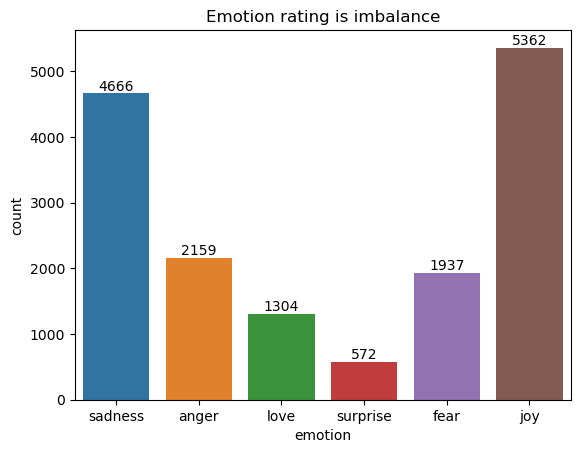

In [581]:
# plot
ax= sns.countplot(x=dataset_train['emotion'],
                  data=dataset_train)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Emotion rating is imbalance")
plt.show()

**make balance between classes**

In [582]:
dataset_train['label'] = dataset_train['emotion']
dataset_train['label'].replace(['joy', 'love', 'surprise'], 'happy', inplace=True)
dataset_train['label'].replace(['sadness', 'anger', 'fear'], 'sad', inplace=True)

In [583]:
dataset_train['label'].unique()

array(['sad', 'happy'], dtype=object)

In [584]:
dataset_train['label'].value_counts()

sad      8762
happy    7238
Name: label, dtype: int64

**show balance between classes**

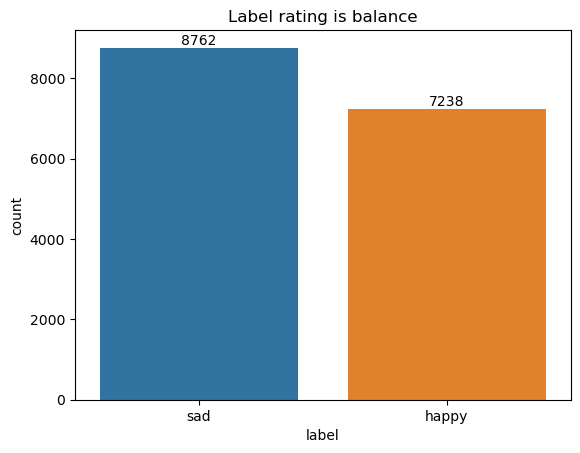

In [585]:
# plot
ax= sns.countplot(x=dataset_train['label'],
                  data=dataset_train)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Label rating is balance")
plt.show()

In [586]:
# replace labels with integer numbers:
dataset_train['label'] = dataset_train['label'].replace({'sad':0, 'happy':1}).astype(int)
dataset_train.head()

,text,emotion,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,0


**Test dataset**

In [587]:
# read test dataset
dataset_test = pd.read_csv(r'data/test.txt', header=None, names= ['text', 'emotion'] ,delimiter=';') 

In [588]:
dataset_test.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [589]:
dataset_test.tail()

,text,emotion
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy
1999,i feel all weird when i have to meet w people ...,fear


In [590]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [591]:
dataset_test.shape

(2000, 2)

In [592]:
dataset_test.describe()

,text,emotion
count,2000,2000
unique,2000,6
top,im feeling rather rotten so im not very ambiti...,joy
freq,1,695


In [593]:
dataset_test.dropna(inplace=True)
dataset_test.isnull().sum()

text       0
emotion    0
dtype: int64

In [594]:
dataset_test['emotion'].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [595]:
dataset_test['emotion'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: emotion, dtype: int64

**show imbalance between classes**

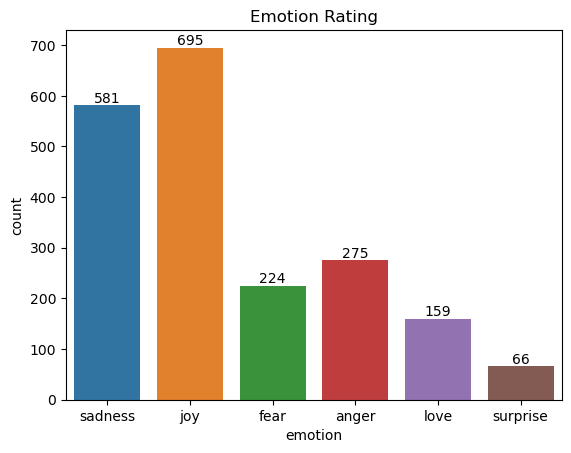

In [596]:
# plot
ax= sns.countplot(x=dataset_test['emotion'],
                  data=dataset_test)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Emotion Rating")
plt.show()

**make balance between classes**

In [597]:
dataset_test['label'] = dataset_test['emotion']
dataset_test['label'].replace(['joy', 'love', 'surprise'], 'happy', inplace=True)
dataset_test['label'].replace(['sadness', 'anger', 'fear'], 'sad', inplace=True)

In [598]:
dataset_test['label'].unique()

array(['sad', 'happy'], dtype=object)

In [599]:
dataset_test['label'].value_counts()

sad      1080
happy     920
Name: label, dtype: int64

**show balance between classes**

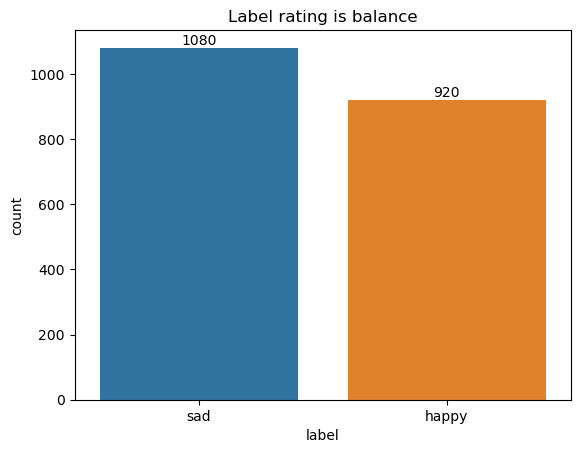

In [600]:
# plot
ax= sns.countplot(x=dataset_test['label'],
                  data=dataset_train)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Label rating is balance")
plt.show()

In [601]:
# replace labels with integer numbers:
dataset_test['label'] = dataset_test['label'].replace({'sad':0, 'happy':1}).astype(int)
dataset_test.head()

,text,emotion,label
0,im feeling rather rotten so im not very ambiti...,sadness,0
1,im updating my blog because i feel shitty,sadness,0
2,i never make her separate from me because i do...,sadness,0
3,i left with my bouquet of red and yellow tulip...,joy,1
4,i was feeling a little vain when i did this one,sadness,0


# *Part 2 - Data preprocessing*

**Noise Removal**

In [21]:
import nltk
from nltk.corpus import stopwords

**show stop words list**

In [22]:
nltk.download('stopwords')
stop_words= stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/elsayedelmandoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Excluding some useful words from stop words list**|

In [23]:
excluding= ['againts', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
            "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn', 
            "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words= [word for word in stop_words if word not in excluding]

+ **split text to tokens using word_tokenize**

    - function is used to split the input text into individual words and return list of strings

In [24]:
from nltk.tokenize import word_tokenize
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     /home/elsayedelmandoh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

+ **word normalization**

    - PorterStemmer: remove common word endings and suffixes, but the resulting stems may not always be actual words.

    - WordNetLemmatizer: get root form of word in their dictionary definitions.

In [25]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
stemmer= PorterStemmer()    
lemmatizer = WordNetLemmatizer()

In [26]:
def preprocessing_dataset(texts):
    cleaned_texts = []  # list to include the cleaned text in.

    for sent in texts: # loop on each sentence
        filtered_sent= []
        tokens= word_tokenize(sent.lower())
        
        for token in tokens: # loop on each token from sentence
            # check if it's not numeric and its length > 2 and not in stop words
            if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words):
                filtered_sent.append(stemmer.stem(token) and lemmatizer.lemmatize(token))
                
        # convert tokens to text
        text= " ".join(filtered_sent) # string of cleaned words 
        cleaned_texts.append(text)
    
    return cleaned_texts

**dataset train**

In [608]:
# cleaning the training text
dataset_train['clean_text'] = preprocessing_dataset(dataset_train['text'].values)

In [609]:
dataset_train.head()

,text,emotion,label,clean_text
0,i didnt feel humiliated,sadness,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,0,feeling hopeless damned hopeful around someone...
2,im grabbing a minute to post i feel greedy wrong,anger,0,grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,1,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,0,feeling grouchy


In [610]:
X_train = dataset_train['clean_text']
y_train = dataset_train['label']

**dataset test**

In [611]:
## cleaning the test text
dataset_test['clean_text'] = preprocessing_dataset(dataset_test['text'].values)

In [612]:
# first 5
dataset_test.head()

,text,emotion,label,clean_text
0,im feeling rather rotten so im not very ambiti...,sadness,0,feeling rather rotten not ambitious right
1,im updating my blog because i feel shitty,sadness,0,updating blog feel shitty
2,i never make her separate from me because i do...,sadness,0,never make separate don ever want feel like as...
3,i left with my bouquet of red and yellow tulip...,joy,1,left bouquet red yellow tulip arm feeling slig...
4,i was feeling a little vain when i did this one,sadness,0,feeling little vain one


In [613]:
# random 10
dataset_test.sample(10)

,text,emotion,label,clean_text
938,i remember feeling thrilled to use my nursing ...,joy,1,remember feeling thrilled use nursing skill re...
1888,i feel comfortable here there was a huge niche...,joy,1,feel comfortable huge niche market waiting exp...
1294,i continue to write this i feel more and more ...,fear,0,continue write feel distraught
339,i feel so worthless and useless these past wee...,sadness,0,feel worthless useless past week certified sta...
1473,ive also been for a run which im feeling parti...,joy,1,ive also run feeling particularly virtuous
1913,i feel enraged by the amount of people partici...,anger,0,feel enraged amount people participating chanc...
148,im feeling reluctant to exit my freshly cleane...,fear,0,feeling reluctant exit freshly cleaned apartme...
227,i feel like i cant be respected if i have self...,joy,1,feel like cant respected self respect regular ...
1475,i did feel things it was often just repressed ...,sadness,0,feel thing often repressed fear anxiety distrust
1828,im feeling weepy already,sadness,0,feeling weepy already


In [614]:
X_test = dataset_test['clean_text']
y_test = dataset_test['label']

# Part 3 - Build Pipline

+ **Build the pipeline**

    - makes it easier to train and evaluate the model

    - which allows you to reuse same preprocessing 
    
    - reuse same modeling steps on new data  
    
    - without retrain the preprocessing steps

In [615]:
from sklearn.pipeline import Pipeline

+ **Term Frequency Inverse Document Frequency (TFIDF)**

    + We can perform feature extraction using the TfidfVectorizer class from the scikit-learn library.
    
    + gives less importance to common words and more importance to rare words that appear in a few documents. 

In [616]:
from sklearn.feature_extraction.text import TfidfVectorizer

+ **Naive bayes classifier**

    + we can perform traning for model using Naive bayes classifier which is fast and simple.

In [617]:
from sklearn.naive_bayes import MultinomialNB

**define pipeline with the TfidfVectorizer and Naive Bayes classifier**

In [618]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

+ **randomized search**

    - help improve the model's performance by finding the best hyperparameters for the TFIDF and Naive Bayes.

In [619]:
from sklearn.model_selection import RandomizedSearchCV

**define new parameters with different values to get the best hyperparameters**

In [620]:
params = {
    # determines the range of n-grams to be used for tokenization.
    # (1, 2) consider unigrams and bigrams
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    # minimum document frequency of a term in the corpus
    # increasing the value of "max_df" to exclude terms that appear too frequently in the corpus.
    'tfidf__max_df': [0.5, 0.75, 1.0],
    # maximum document frequency of a term in the corpus
    # decreasing the value of "min_df" to allow more terms to be included,
    'tfidf__min_df': [1, 2, 3],
    'nb__alpha': [0.1, 0.5, 1.0]
}

**define randomized search**

In [621]:
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=params,# parameters grid  
                                   n_iter=20,# number of iteration
                                   cv=5)# Cross-validation to evaluate the model's performance


**fit randomized search on training data and labels.**

In [622]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('nb', MultinomialNB())]),
                   n_iter=20,
                   param_distributions={'nb__alpha': [0.1, 0.5, 1.0],
                                        'tfidf__max_df': [0.5, 0.75, 1.0],
                                        'tfidf__min_df': [1, 2, 3],
                                        'tfidf__ngram_range': [(1, 1), (1, 2),
                                                               (2, 2)]})

+ **params for number of iteration**

In [623]:
pd.DataFrame(random_search.cv_results_)[["params"]]

,params
0,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
1,"{'tfidf__ngram_range': (1, 2), 'tfidf__min_df'..."
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."
3,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__min_df'..."
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__min_df'..."
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'..."
8,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."
9,"{'tfidf__ngram_range': (2, 2), 'tfidf__min_df'..."


+ **best hyperparameters and score**

    - by the random search object can be accessed using: 

    - the best_params_ attribute

    - The best_score_ attribute 

In [624]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {round(random_search.best_score_*100)}%")

Best parameters: {'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 3, 'tfidf__max_df': 0.75, 'nb__alpha': 0.5}
Best score: 95%


# Part 4 - Traning machine learning model
+ we can train the Naive Bayes model on the training data and labels 
using the pipeline with the best hyperparameters.

In [625]:
best_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=random_search.best_params_['tfidf__ngram_range'], 
                              max_df=random_search.best_params_['tfidf__max_df'], 
                              min_df=random_search.best_params_['tfidf__min_df'])),
    ('nb', MultinomialNB(alpha=random_search.best_params_['nb__alpha']))
])

best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.75, min_df=3, ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.5))])

**make predictions on test data using the trained model**

In [626]:
y_pred = best_pipeline.predict(X_test)

# Part 5 - Evaluation

In [627]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

**accuracy score**

In [628]:
# compute accuracy score with y-test and y-predictions
# number of correct predictions divided by the total number of predictions.

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100)}%")

Accuracy: 95%


+ **classification_report**

    - helps evalute the performance of a classification model by providing metrics such as 
    
    - **precision**: calculated as the ratio of true positive predictions to the total predicted positive and avoid false positives.
    
    - **recall**: calculated as the ratio of true positive predictions to the total predicted positive and avoid false negatives
    
    - **F1-score**: harmonic mean of precision and recall
    
    - **support**: number of samples in class

In [629]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1080
           1       0.96      0.94      0.95       920

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



+ **Confusion matrix** Table that shows the 

    - true positive     - true negative

    - false positive    - false negative

    - values to predict actual values and create heatmap

In [630]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1043   37]
 [  55  865]]


# Part 6 - Visualization

**Heatmap of the confusion matrix**

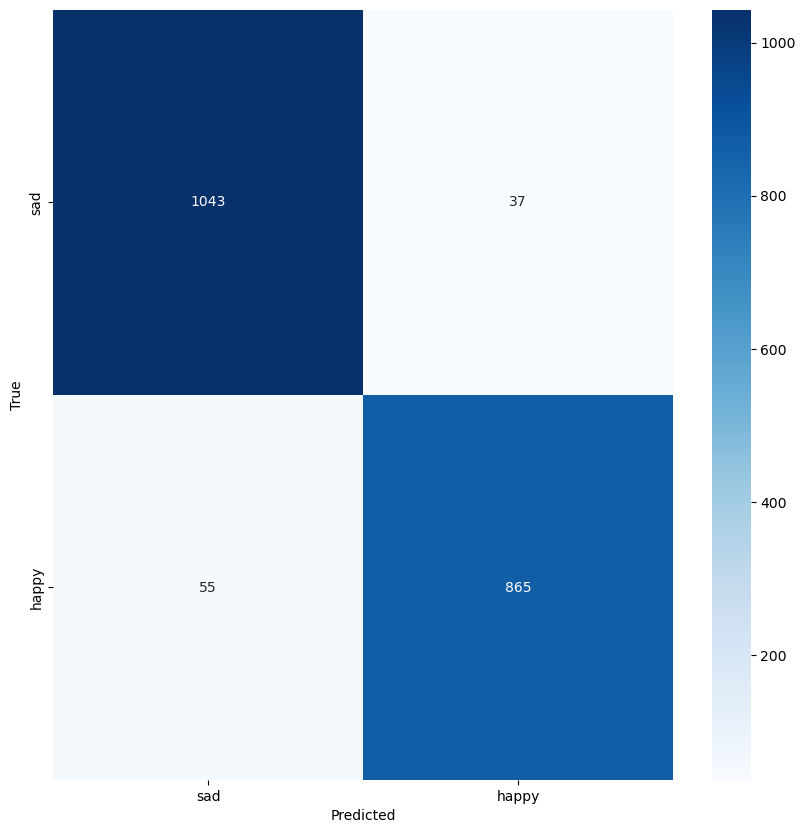

In [631]:
plt.figure(figsize = (10,10))
labels = ['sad', 'happy']
sns.heatmap(cm, 
            xticklabels=labels, 
            yticklabels=labels, 
            annot=True, 
            cmap='Blues', 
            fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Part 7 - Save the pipline
+ joblib
    - to reuse the same preprocessing steps and classifier on new data 
    - without having to redefine them each time.


In [632]:
import joblib
joblib.dump(best_pipeline,r'models/pipeline_tfidf_nb_24_may_2023.pkl') 

['pipeline_tfidf_nb.pkl']